<a href="https://colab.research.google.com/github/Valiev-Koyiljon/MLBasics/blob/main/ML_RandomForest(w10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Random Forest Implementation in Python

In [ ]:
# #. uploading the data to colab
# from google.colab import files
# upload = files.upload()

In [18]:
# Import Libraries:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

# Loading dataset
df = sn.load_dataset('penguins')
df.sample(10)

# See the information of the data
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [22]:
df['species']

344

In [16]:
# Found some features are in object form, need to convert them into numerical
# using either Label or One-Hot encoder
lb = LabelEncoder()
data = df
data['species'] = lb.fit_transform(data['species'])
data['island'] = lb.fit_transform(data['island'])
data['sex'] = lb.fit_transform(data['sex'])
data.sample(10)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    int64  
 1   island             344 non-null    int64  
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                344 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 18.9 KB


In [6]:
# Data cleaning
data.replace([np.Inf, -np.Inf], np.nan, inplace = True)
data.replace(np.nan, 0, inplace = True)

# Seperate the data into input and output variables
X = data
Y = X['species']
X.drop('species', axis = 1, inplace = True)



In [9]:
# Data Normalization (i.e., Min Max Normalizer)
ms = MinMaxScaler()
X = ms.fit_transform(X)

# Split the data into train and test data samples
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, random_state = 5)

# Define the ML model
model = RandomForestClassifier(n_estimators = 7, criterion = 'entropy', random_state = 42)
# Train the model
model.fit(xtrain, ytrain)

# Predict the output of the xtest data
pred = model.predict(xtest)


              precision    recall  f1-score   support

           0       0.98      0.96      0.97        45
           1       0.86      0.95      0.90        19
           2       1.00      0.97      0.99        40

    accuracy                           0.96       104
   macro avg       0.94      0.96      0.95       104
weighted avg       0.96      0.96      0.96       104



Text(95.72222222222221, 0.5, 'Actual')

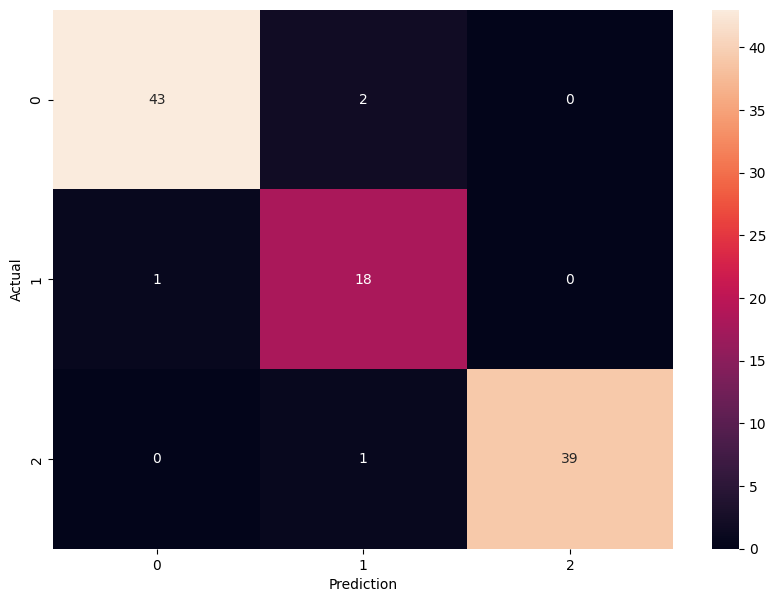

In [8]:
# Evaluation results of the ML model
cr = classification_report(ytest, pred)
print(cr)

# to see the confusion matrix
cm = confusion_matrix(ytest, pred)

# Plot the confusion matrix table
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Prediction')
plt.ylabel('Actual')

###Checking our model with observations (new data)

In [23]:

# the class of an unidentified "Penguins Species" based on its characteristics (observations).
# These new observations include:
# [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]


# The categorical values (species, island, sex) are assumed to be encoded as integers.
observations = [

       2,         # Assuming '2' corresponds to a specific island after encoding
         45.2,  # Bill length in mm (continuous variable)
        18.6,   # Bill depth in mm (continuous variable)
         200, # Flipper length in mm (continuous variable)
         5000,     # Body mass in grams (continuous variable)
         0               # Assuming '0' corresponds to a specific sex after encoding

]


# Data generalization
# Step 1: Convert the new observation into Pandas dataframe
# Step 2: Reshape the observations data
# Step 3: Normalize the observation
# Step 4: Input the observation into the ML model to predict the class it belongs to

observations = pd.DataFrame(observations)
print("Get the shape of the data:\n", observations)
print("...........................................\n")
# Notice how it transforms into a row matrix, even though the initial dataset structure
# was in the form of a 2D matrix. Consequently, we need to reshape it.
observations = observations.transpose()
observations = ms.fit_transform(observations)
prediction = model.predict(observations)
print("The predicted class of the new observation is: class", prediction)


Get the shape of the data:
         0
0     2.0
1    45.2
2    18.6
3   200.0
4  5000.0
5     0.0
...........................................

The predicted class of the new observation is: class [2]
